In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


# Load the dataset
data = pd.read_csv("amazon_prime_titles.csv")  # Replace with your actual dataset file path

# Data Exploration
# Display the first few rows of the dataset
print(data.head())

# Summary statistics of numeric columns
print(data.describe())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

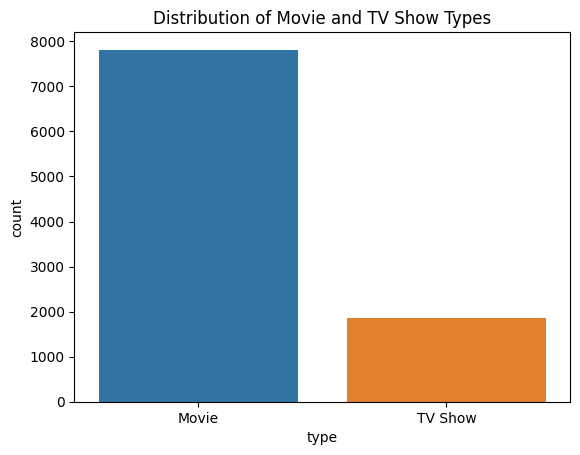

In [2]:
# Data Visualization
# Distribution of 'type' (Movie or TV Show)
sns.countplot(x='type', data=data)
plt.title('Distribution of Movie and TV Show Types')
plt.show()

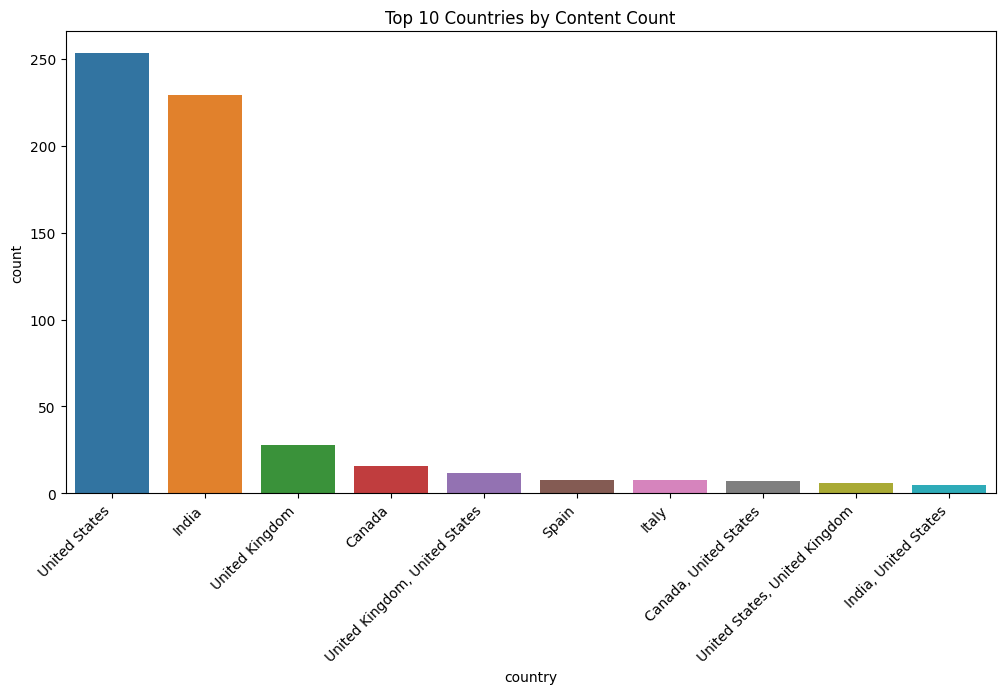

In [3]:
# Distribution of content by country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=data, order=data['country'].value_counts().index[:10])
plt.xticks(rotation=45, ha="right")
plt.title('Top 10 Countries by Content Count')
plt.show()

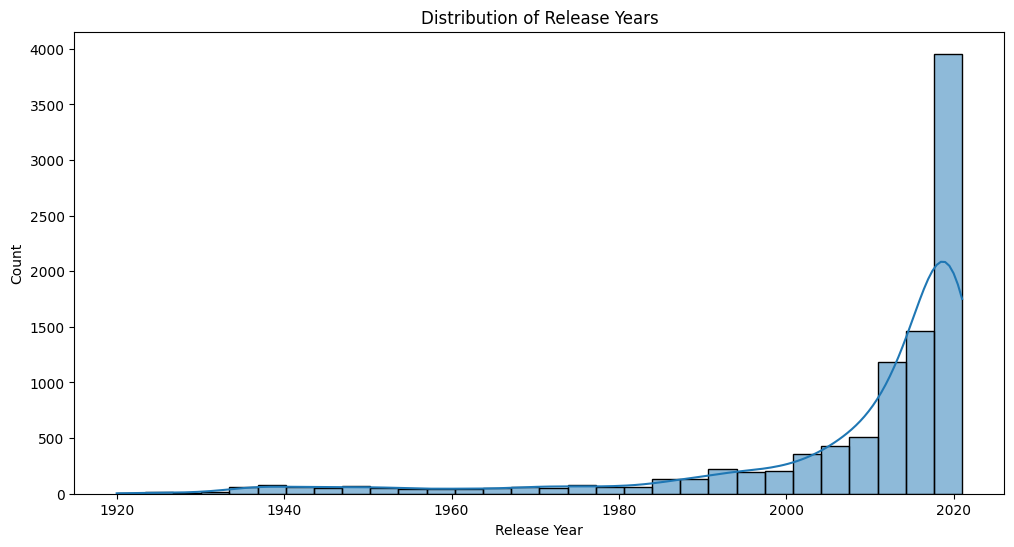

In [4]:
# Release year distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

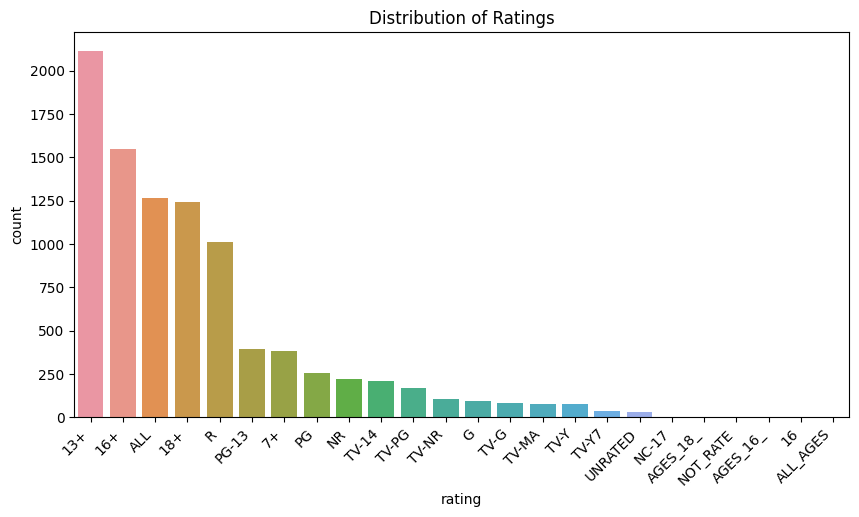

In [5]:
# Rating distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45, ha="right")
plt.show()

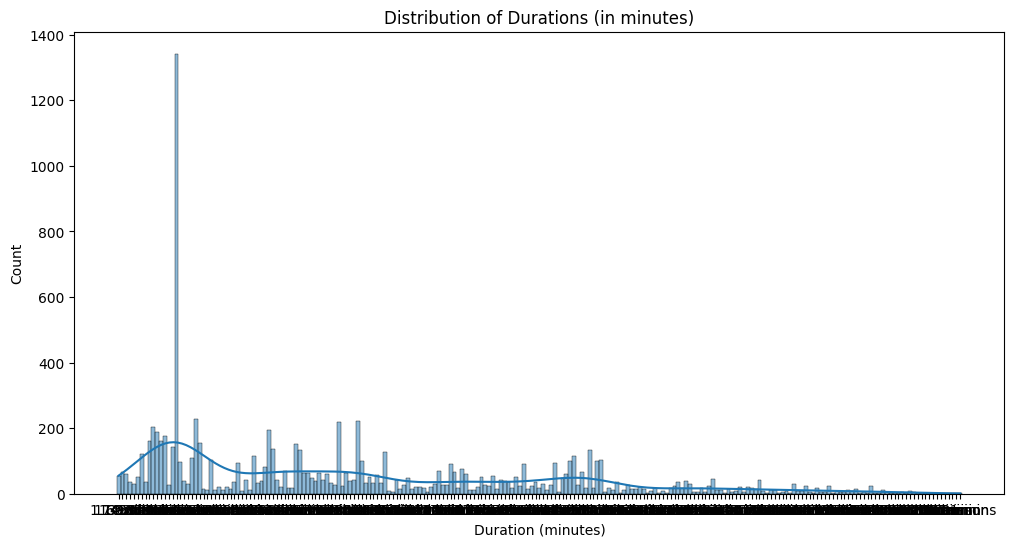

In [6]:
# Duration analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['duration'], bins=30, kde=True)
plt.title('Distribution of Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [7]:

# Creating a feature 'content_age' based on the release year
current_year = 2023  # Replace with the current year
data['content_age'] = current_year - data['release_year']

In [8]:
#Building a basic movie or TV show recommendation system based on user preferences

# Ensure that 'duration' column only contains numeric values (duration in minutes)
data['duration'] = data['duration'].str.replace(' min', '', regex=True)
data['duration'] = data['duration'].str.replace(' Season', '', regex=True)
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Now, you can filter based on user preferences
user_preferences = {
    'content_age': 5,  # Prefer content released within the last 5 years
    'duration': 120,   # Prefer content with a duration of 2 hours (120 minutes)
    'rating': 'PG-13', # Prefer content with a PG-13 rating
    'type': 'Movie'    # Prefer movies
}

# Filter the dataset based on user preferences
recommended_content = data[
    (data['content_age'] <= user_preferences['content_age']) &
    (data['duration'] <= user_preferences['duration']) &
    (data['rating'] == user_preferences['rating']) &
    (data['type'] == user_preferences['type'])
]

# Display recommended content
print("Recommended Content:")
print(recommended_content[['title', 'content_age', 'duration', 'rating', 'type']])



Recommended Content:
                                        title  content_age  duration rating  \
73                    Words On Bathroom Walls            3     111.0  PG-13   
117                       Where Love Found Me            5      85.0  PG-13   
402                         The Vast of Night            3      91.0  PG-13   
414            The True Adventures of Wolfboy            3      89.0  PG-13   
675    The Extraordinary Journey of the Fakir            4      98.0  PG-13   
848            Super Size Me 2: Holy Chicken!            4     103.0  PG-13   
946                    Sometimes Always Never            3      91.0  PG-13   
983                         Sketchy Behaviour            4      64.0  PG-13   
1223                              Radioactive            3     110.0  PG-13   
1335                               Photograph            4     109.0  PG-13   
1795                           Love's Kitchen            3      90.0  PG-13   
1867                  Life In A

In [9]:

# Preprocess the data (e.g., handle missing values, data transformation)
data['description'] = data['description'].fillna('')  # Fill missing descriptions

# Create a TF-IDF matrix for the item descriptions
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

# Compute the cosine similarity between item descriptions
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a series with movie titles as the index and movie indices as values
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Get movie recommendations for a specific movie title (replace with the movie title you want)
movie_title = 'The Grand Seduction'
recommended_movies = get_recommendations(movie_title)
print(recommended_movies)


5014    Mobutu's African Movie Theater: Episode 5
5203                                 Mango Dreams
4319                               Kadaram Kondan
1407                                 Oru Kai Osai
2638                        Doctor Blood's Coffin
6793                            The German Doctor
5966                                   Chittibabu
8274                             Raja Chinna Roja
1694                           Meet Dr. Christian
508                                The North Star
Name: title, dtype: object
